In [136]:
#Below progream utilities to generate data for Customer Price Prediction
#import random
#Create 1000 random Sold To customers 
#for i in range(1000):
    #print (random.randint(1010000001,1030000000))


In [137]:
#Create 1000 random Ship To customers 
#for i in range(1000):
    #print (random.randint(2010000001,2030000000))

In [138]:
#Generate 100 random material numbers
#for i in range(100):
    #print (random.randint(40321003001,40331003000))

In [139]:
#Generate 100 random qty
#for i in range(100):
    #print (random.randint(1,100))

In [140]:
#Generate random Price per qty
#for i in range(100):
    #print (random.randint(1, 1500))

In [141]:
#Load all required libraries here
import os
import pandas as pd
pd.set_option('float_format', '{:f}'.format)
import numpy as np
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

In [142]:

#Function to download and read customer data CSV file
DATA_FILES_PATH = r"C:\\Users\\gchandr4\\Documents\\Anaconda\\datasets"
def load_customer_data(data_path=DATA_FILES_PATH):
    csv_path = os.path.join(data_path, "customer_data.csv")
    return pd.read_csv(csv_path)


In [143]:
customer_file = load_customer_data()
customer_file.head()

,Sold To,Ship To,Material,Price/Qty (USD),Qty,Total Price (USD)
0,1019733606,2020999825,40321040322,676,96,64896
1,1018240245,2011020734,40329968668,412,92,37904
2,1013606125,2021012587,40325529556,533,41,21853
3,1026160794,2018327772,40326638721,188,19,3572
4,1019775063,2012844064,40324755545,720,60,43200


In [144]:
#Check what are types, any null value etc
customer_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Sold To            1000 non-null   int64
 1   Ship To            1000 non-null   int64
 2   Material           1000 non-null   int64
 3   Price/Qty (USD)    1000 non-null   int64
 4   Qty                1000 non-null   int64
 5   Total Price (USD)  1000 non-null   int64
dtypes: int64(6)
memory usage: 47.0 KB


In [145]:
#Check count, mean, min, max etc
customer_file.describe()

,Sold To,Ship To,Material,Price/Qty (USD),Qty,Total Price (USD)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1020197436.905000,2019884464.543000,40325922569.290001,749.950000,52.960000,39472.490000
std,5787611.235765,5768255.739632,2737373.482433,429.822772,28.118126,31762.091626
min,1010032367.000000,2010000397.000000,40321040322.000000,18.000000,1.000000,126.000000
25%,1015332674.000000,2014710171.750000,40323524207.000000,351.500000,30.750000,11106.500000
50%,1020311913.500000,2019947613.500000,40325998357.500000,751.500000,55.000000,31244.500000
75%,1025122356.000000,2024810432.500000,40328159357.750000,1137.500000,76.500000,64362.750000
max,1029983677.000000,2029992956.000000,40330737617.000000,1481.000000,98.000000,117467.000000


array([[<AxesSubplot:title={'center':'Sold To'}>,
        <AxesSubplot:title={'center':'Ship To'}>],
       [<AxesSubplot:title={'center':'Material'}>,
        <AxesSubplot:title={'center':'Price/Qty (USD)'}>],
       [<AxesSubplot:title={'center':'Qty'}>,
        <AxesSubplot:title={'center':'Total Price (USD)'}>]], dtype=object)

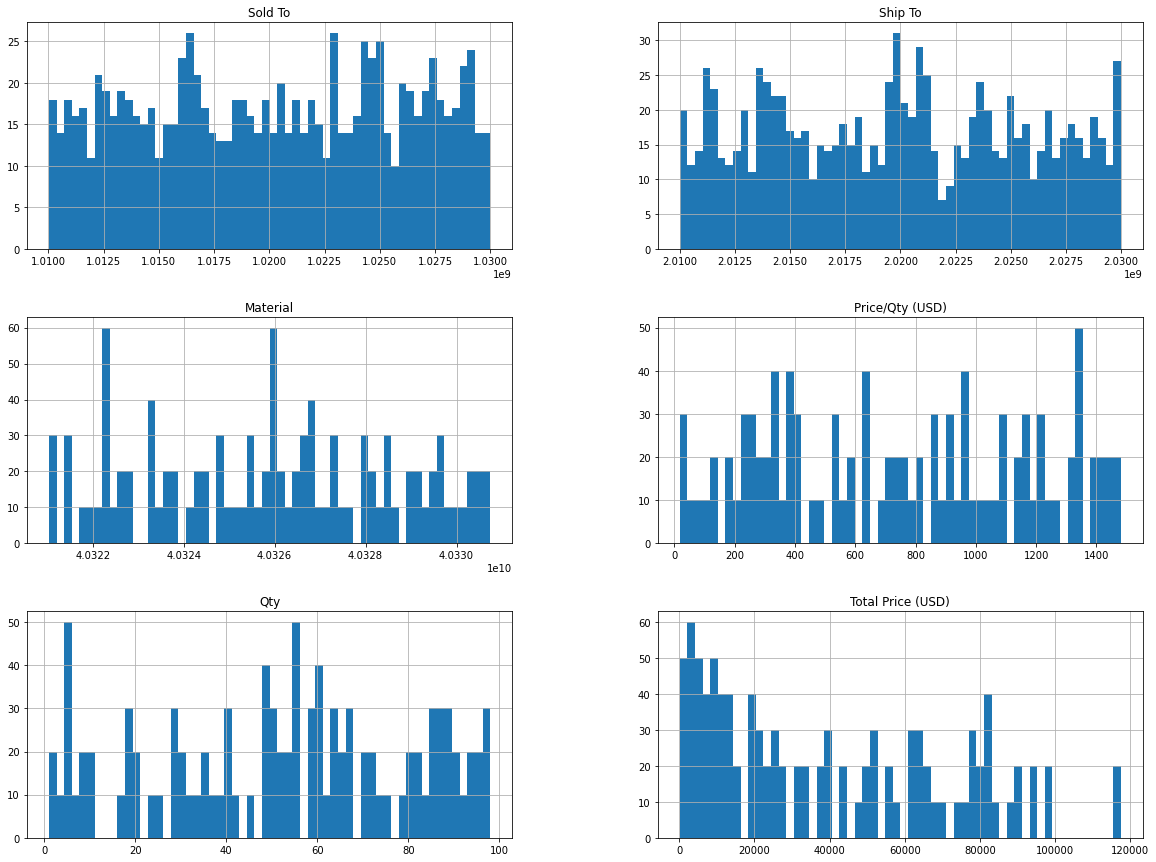

In [146]:
#Quick Histogram to view the data of those all 6 colums Sold To, Ship To, Material, Price/Qty, Qty and Total Price
%matplotlib inline
import matplotlib.pyplot as plt
customer_file.hist(bins=58, figsize=(20,15))

In [147]:
#Option 1
#Split data into 80% training and 20% testing data

def split_customer_data(customer_data, split_ratio):
    shuffled_data = np.random.permutation(len(customer_data))
    test_data_size = int(len(customer_data) * split_ratio)
    test_data = shuffled_data[:test_data_size]
    train_data = shuffled_data[test_data_size:]
    return customer_data.iloc[train_data], customer_data.iloc[test_data]

train_data1, test_data1 = split_customer_data(customer_file, 0.2)
len(train_data1)

800

In [148]:
len(test_data1)

200

In [149]:
#Option 2
#Splitdata data into 80% training and 20% testing data with id columns \
#(You can also manually enter in CSV file but it would be good to automated without disturbing files
from zlib import crc32

def test_data_validate(id, split_ratio):
    return crc32(np.int64(id)) & 0xffffffff < split_ratio * 2**32

def split_customer_data_by_id(customer_data, split_ratio, id_col):
    ids = customer_data[id_col]
    test_id_size = ids.apply(lambda id_: test_data_validate(id_, split_ratio))
    return customer_data.loc[~test_id_size], customer_data.loc[test_id_size]

In [150]:
#Add index column and values
customer_file_with_id = customer_file.reset_index()

train_data2, test_data2 = split_customer_data_by_id(customer_file_with_id, 0.2, "index")


In [151]:
len(train_data2)
train_data2.head()

,index,Sold To,Ship To,Material,Price/Qty (USD),Qty,Total Price (USD)
0,0,1019733606,2020999825,40321040322,676,96,64896
1,1,1018240245,2011020734,40329968668,412,92,37904
3,3,1026160794,2018327772,40326638721,188,19,3572
4,4,1019775063,2012844064,40324755545,720,60,43200
6,6,1025493402,2019303071,40325053712,392,98,38416


In [152]:
len(test_data2)
test_data2.head()

,index,Sold To,Ship To,Material,Price/Qty (USD),Qty,Total Price (USD)
2,2,1013606125,2021012587,40325529556,533,41,21853
5,5,1019168696,2014550373,40325825188,857,72,61704
12,12,1028689769,2011296925,40329651121,911,56,51016
16,16,1021567786,2020965442,40329212047,1394,19,26486
23,23,1023489172,2026731623,40321466708,883,91,80353


In [153]:
#Option 3
#Use Scikit-Learn do all these jobs in one line of code
train_data3, test_data3 = train_test_split(customer_file, test_size=0.2, random_state=42)
len(train_data3)

800

In [154]:
train_data3.head()

,Sold To,Ship To,Material,Price/Qty (USD),Qty,Total Price (USD)
29,1027565334,2025511779,40326545666,933,1,933
535,1021047754,2019111576,40328556698,968,87,84216
695,1019956946,2016870757,40323287609,629,2,1258
557,1018915017,2024118077,40323691890,141,30,4230
836,1029006489,2014551279,40327963841,589,58,34162


In [155]:
len(test_data3)

200

In [156]:
test_data3.head()

,Sold To,Ship To,Material,Price/Qty (USD),Qty,Total Price (USD)
521,1016427172,2013772194,40326018182,965,26,25090
737,1012756339,2019364089,40321945132,80,24,1920
740,1026113399,2011416676,40326745519,27,58,1566
660,1019990794,2019200113,40328152382,1332,48,63936
411,1024313810,2029383800,40322838435,1323,9,11907


In [157]:
#Let's take Train3 and Test3 and we will work on this

customer_train_data = train_data3.copy()
customer_train_data.describe()

,Sold To,Ship To,Material,Price/Qty (USD),Qty,Total Price (USD)
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,1020318680.218750,2019919872.960000,40325940023.787498,741.868750,53.177500,39045.485000
std,5744213.314754,5730517.821724,2715757.408056,429.190785,28.454887,31580.980118
min,1010032367.000000,2010000397.000000,40321040322.000000,18.000000,1.000000,126.000000
25%,1015514711.250000,2014777575.000000,40323560165.000000,344.000000,30.000000,10235.000000
50%,1020490620.500000,2019990026.500000,40325996917.000000,744.000000,55.000000,31101.000000
75%,1025195015.000000,2024580885.750000,40328180285.000000,1107.750000,78.500000,64896.000000
max,1029983677.000000,2029992956.000000,40330737617.000000,1481.000000,98.000000,117467.000000


<AxesSubplot:xlabel='Qty', ylabel='Price/Qty (USD)'>

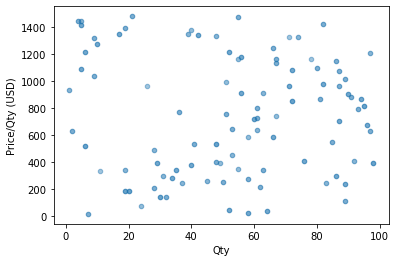

In [158]:
#Visualize customer order qty and price
customer_train_data.plot(kind="scatter", x="Qty", y="Price/Qty (USD)", alpha=0.1)

In [159]:
#Let's check Correlations between these columns
#Strong positive correlation shows 1 and negative corelations shows -1 however if we get many features then it varies

customer_data_corr = customer_train_data.corr()

In [160]:
#Let's check Correlation for Price/Qty (USD)
#Shows strong linear correlation Total Price and Material
customer_data_corr["Price/Qty (USD)"].sort_values(ascending=False)

Price/Qty (USD)      1.000000
Total Price (USD)    0.574269
Material             0.056419
Sold To              0.018880
Ship To             -0.018163
Qty                 -0.033224
Name: Price/Qty (USD), dtype: float64

In [161]:
#Let's check Correlation for Ship To (USD)
#Shows strong linear correlation Sold and Material
customer_data_corr["Ship To"].sort_values(ascending=False)

Ship To              1.000000
Sold To              0.021118
Material            -0.002214
Qty                 -0.004314
Total Price (USD)   -0.007003
Price/Qty (USD)     -0.018163
Name: Ship To, dtype: float64

In [162]:
#Let's check Correlation for Sold To (USD)
#Shows strong linear correlation Material and Ship To
customer_data_corr["Sold To"].sort_values(ascending=False)

Sold To              1.000000
Material             0.034665
Ship To              0.021118
Price/Qty (USD)      0.018880
Total Price (USD)   -0.002010
Qty                 -0.026481
Name: Sold To, dtype: float64

array([[<AxesSubplot:xlabel='Sold To', ylabel='Sold To'>,
        <AxesSubplot:xlabel='Ship To', ylabel='Sold To'>,
        <AxesSubplot:xlabel='Material', ylabel='Sold To'>,
        <AxesSubplot:xlabel='Price/Qty (USD)', ylabel='Sold To'>,
        <AxesSubplot:xlabel='Qty', ylabel='Sold To'>,
        <AxesSubplot:xlabel='Total Price (USD)', ylabel='Sold To'>],
       [<AxesSubplot:xlabel='Sold To', ylabel='Ship To'>,
        <AxesSubplot:xlabel='Ship To', ylabel='Ship To'>,
        <AxesSubplot:xlabel='Material', ylabel='Ship To'>,
        <AxesSubplot:xlabel='Price/Qty (USD)', ylabel='Ship To'>,
        <AxesSubplot:xlabel='Qty', ylabel='Ship To'>,
        <AxesSubplot:xlabel='Total Price (USD)', ylabel='Ship To'>],
       [<AxesSubplot:xlabel='Sold To', ylabel='Material'>,
        <AxesSubplot:xlabel='Ship To', ylabel='Material'>,
        <AxesSubplot:xlabel='Material', ylabel='Material'>,
        <AxesSubplot:xlabel='Price/Qty (USD)', ylabel='Material'>,
        <AxesSubplot:xlabel

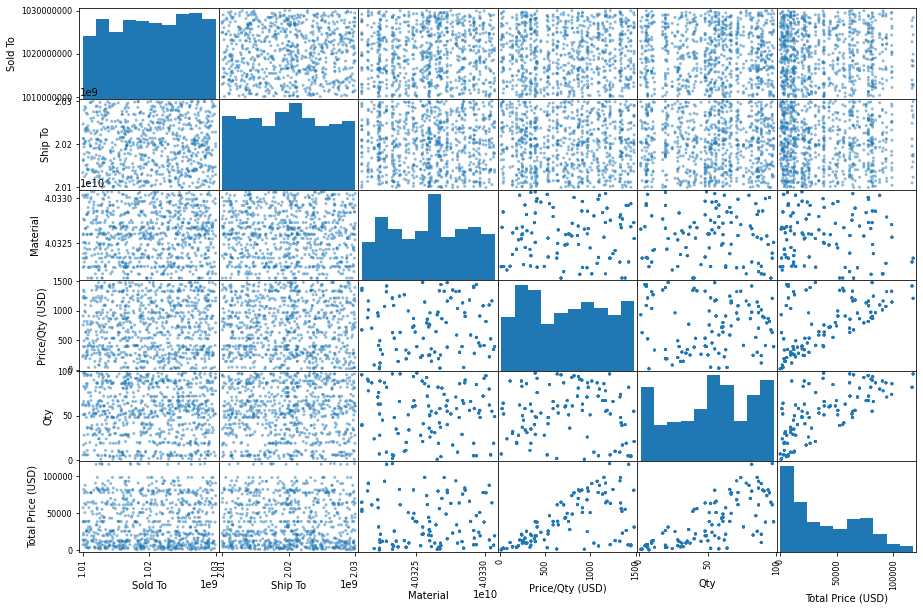

In [163]:
#Let's check Correlation in graphical way using pandas scatter matrix
attributes = ["Sold To", "Ship To", "Material", "Price/Qty (USD)", "Qty", "Total Price (USD)"]
scatter_matrix(customer_train_data[attributes], figsize=(15,10))

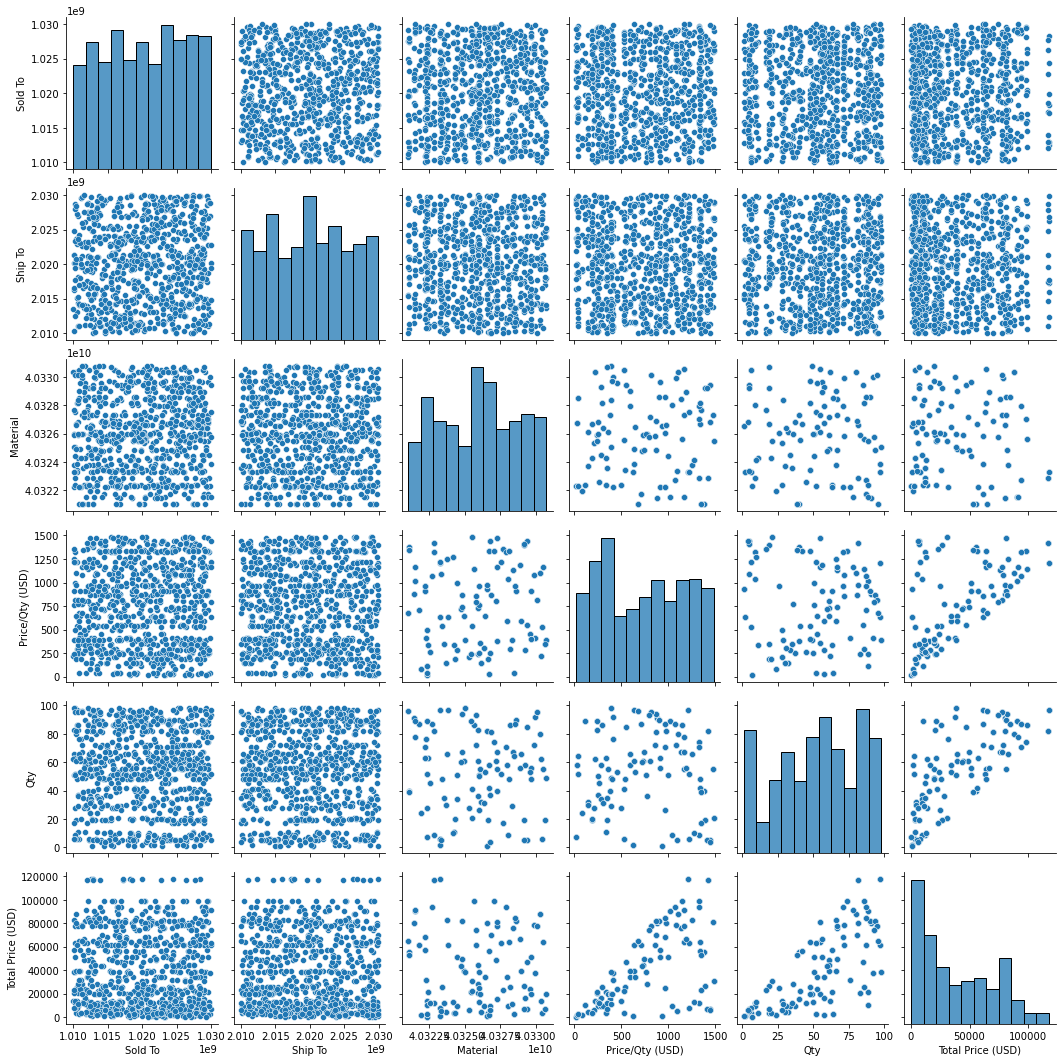

In [164]:
#Let's check in Seaborn Pairplot library as you can see same like above
import seaborn as sns
sns.pairplot(customer_train_data)

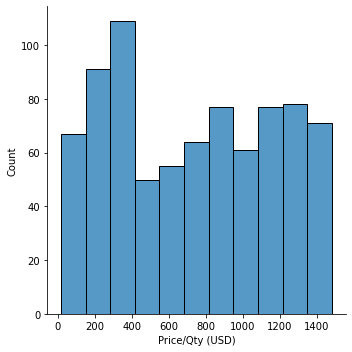

In [165]:
#let's check in Seaborn plot of Price/Qty (USD) as price falls more count on 300 to 400
sns.displot(customer_train_data['Price/Qty (USD)'])

<AxesSubplot:>

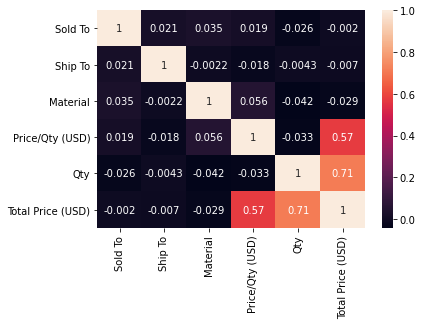

In [166]:
#Correlation of each field in Seaborn Heatmap and Seaborn more useful than above correlation
sns.heatmap(customer_train_data.corr(), annot=True)

In [167]:
customer_train_data_x= customer_train_data.drop("Price/Qty (USD)", axis=1)
customer_train_data_x.head()

,Sold To,Ship To,Material,Qty,Total Price (USD)
29,1027565334,2025511779,40326545666,1,933
535,1021047754,2019111576,40328556698,87,84216
695,1019956946,2016870757,40323287609,2,1258
557,1018915017,2024118077,40323691890,30,4230
836,1029006489,2014551279,40327963841,58,34162


In [168]:
customer_train_data_y = customer_train_data["Price/Qty (USD)"].copy()
customer_train_data_y

29      933
535     968
695     629
557     141
836     589
       ... 
106     392
270     744
860    1332
435     968
102     533
Name: Price/Qty (USD), Length: 800, dtype: int64

In [169]:
customer_train_data.describe()

,Sold To,Ship To,Material,Price/Qty (USD),Qty,Total Price (USD)
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,1020318680.218750,2019919872.960000,40325940023.787498,741.868750,53.177500,39045.485000
std,5744213.314754,5730517.821724,2715757.408056,429.190785,28.454887,31580.980118
min,1010032367.000000,2010000397.000000,40321040322.000000,18.000000,1.000000,126.000000
25%,1015514711.250000,2014777575.000000,40323560165.000000,344.000000,30.000000,10235.000000
50%,1020490620.500000,2019990026.500000,40325996917.000000,744.000000,55.000000,31101.000000
75%,1025195015.000000,2024580885.750000,40328180285.000000,1107.750000,78.500000,64896.000000
max,1029983677.000000,2029992956.000000,40330737617.000000,1481.000000,98.000000,117467.000000


In [170]:
#Apply feature scaling using Pipeline as we have numerical attributes have different values in each colum,
# so we need o do min-max scaling and standarization of data.
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

customer_data_pipeline = Pipeline([('std_scaler', StandardScaler())])

customer_data_pipeline_tr = customer_data_pipeline.fit_transform(customer_train_data_x)
customer_data_pipeline_tr

array([[ 1.26234643,  0.9764221 ,  0.22314994, -1.83483918, -1.20757264],
       [ 0.12700257, -0.14113953,  0.96411821,  1.18937949,  1.43120235],
       [-0.06301307, -0.53241671, -0.97728689, -1.79967385, -1.1972752 ],
       ...,
       [ 1.23018703,  1.18247717,  0.81514727, -0.18206851,  0.78864196],
       [-1.14424485, -1.45886269,  0.96411821,  1.18937949,  1.43120235],
       [-0.97055635, -0.566122  , -0.15123758, -0.42822585, -0.54473421]])

In [171]:
from sklearn.compose import ColumnTransformer

customer_data_attributes = list(customer_train_data_x)

customer_full_pipeline = ColumnTransformer([
    ("num", customer_data_pipeline, customer_data_attributes)
])

customer_train_data_prepared = customer_full_pipeline.fit_transform(customer_train_data_x)
customer_train_data_prepared

array([[ 1.26234643,  0.9764221 ,  0.22314994, -1.83483918, -1.20757264],
       [ 0.12700257, -0.14113953,  0.96411821,  1.18937949,  1.43120235],
       [-0.06301307, -0.53241671, -0.97728689, -1.79967385, -1.1972752 ],
       ...,
       [ 1.23018703,  1.18247717,  0.81514727, -0.18206851,  0.78864196],
       [-1.14424485, -1.45886269,  0.96411821,  1.18937949,  1.43120235],
       [-0.97055635, -0.566122  , -0.15123758, -0.42822585, -0.54473421]])

In [172]:
#Write small function to check Scores, Mean and Standard Deviation
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [173]:
#Let's check in other model Random Forest Regressor to see whether it performs better
from sklearn.ensemble import RandomForestRegressor
ran_forest_reg = RandomForestRegressor()
ran_forest_reg.fit(customer_train_data_prepared, customer_train_data_y)

RandomForestRegressor()

In [174]:
ran_forest_some_data_x = customer_train_data_x.iloc[:10]

In [175]:
ran_forest_some_data_y = customer_train_data_y.iloc[:10]

In [176]:
ran_forest_some_data_prepared = customer_full_pipeline.transform(ran_forest_some_data_x)

In [177]:
print("Random Forest Regression Customer Price Prediction Y hat:", ran_forest_reg.predict(ran_forest_some_data_prepared))
print("Random Forest Regression Customer Price Actual Y: ", list(ran_forest_some_data_y))

Random Forest Regression Customer Price Prediction Y hat: [ 933.    969.53  629.    141.    589.    647.13  454.79 1074.    629.
 1352.  ]
Random Forest Regression Customer Price Actual Y:  [933, 968, 629, 141, 589, 646, 454, 1074, 629, 1352]


In [178]:
#Measure Random Forest Regression model Root Mean Squared error 
from sklearn.metrics import mean_squared_error

ran_forest_price_predict = ran_forest_reg.predict(customer_train_data_prepared)
price_pred_ran_forest_mse = mean_squared_error(customer_train_data_y, ran_forest_price_predict)
print("Random Forest Regression Customer Price Prediction Mean Squared Error: ", price_pred_ran_forest_mse)
price_pred_ran_forest_rmse = np.sqrt(price_pred_ran_forest_mse)
print("Random Forest Regression Customer Price Prediction Root Mean Squared Error: ", price_pred_ran_forest_rmse)

Random Forest Regression Customer Price Prediction Mean Squared Error:  1.263987375000006
Random Forest Regression Customer Price Prediction Root Mean Squared Error:  1.1242719310736198


In [179]:
#Let's check cross validation
from sklearn.model_selection import cross_val_score
ran_forest_scores = cross_val_score(ran_forest_reg, customer_train_data_prepared, customer_train_data_y, scoring="neg_mean_squared_error", cv=10)
ran_forest_rmse_scores = np.sqrt(-ran_forest_scores)
ran_forest_rmse_scores

array([3.47370389, 2.15424668, 6.94447163, 2.78877325, 3.87279195,
       3.19689126, 3.24164811, 9.04576379, 7.65195988, 9.35070024])

In [180]:
display_scores(price_pred_ran_forest_rmse)

Scores:  1.1242719310736198
Mean:  1.1242719310736198
Standard deviation:  0.0


In [181]:
#Conclusion Random Forest Regressor model more promising than linear Regression model
#In future, we will add grid search adding hyperparameters to give best value output and deploy the model for SAP.